In [1]:
'''Code to plot EDS spectra anaylsis from a master .csv or .txt directory
Code by Scott Gleason, University of New South Wales (UNSW), Australia 
S.Gleason@student.unsw.edu.au, April 2015'''

'''Future Devlopment - Make a derivative and intergration of the dataMatrix,
and plot all 3 Matrixs in a row for each file (see SoftwareCap). 
This will be for plotting DSC / SMG data'''

'Future Devlopment - Make a derivative and intergration of the dataMatrix,\nand plot all 3 Matrixs in a row for each file (see SoftwareCap). \nThis will be for plotting DSC / SMG data'

In [2]:
'''Imports numpy, matplotlib, and glob libaries 
numpy & matplotlib allow for complex math
glob allows for pattern matching with * and ? wild cards
    (note glob's only function is glob (i.e. glob.glob('search critrea')))'''

%matplotlib inline
'Generates plots inline of the notebook. Commit out if want indivudual files'

import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
cd 'C:\Users\z3492622\Documents\PhD Project\Results'

C:\Users\z3492622\Documents\PhD Project\Results


In [4]:
cd 'SEM\\2015-04-04 (T2 3 5)\EDS Anaylsis'

C:\Users\z3492622\Documents\PhD Project\Results\SEM\2015-04-04 (T2 3 5)\EDS Anaylsis


In [5]:
'Directs to directory containing files to be anaylised'

Folder = 'Python Code Test'

print 'Directory to be anaylised:'
print Folder

Directory to be anaylised:
Python Code Test


In [6]:
def dataFilesRange(FileType, StartFile=0, EndFile=None):
    '''Preforms a glob list of *.filetype within directory
    FileType = csv, txt, etc
    StartFile = Number of first file to be anaylsis from the glob
        Defaulted to 0
    EndFile = Number of last file to be anaylsis from the glob
        Defaulted to None, as to return last value'''
    
    'assertion test for the function'
    assert StartFile > -1, 'First file must be atleast 0'
    if EndFile<>None:
        assert EndFile > 0, 'Last file must be atleast 1'

    dataFiles = glob.glob(Folder + '\*.'+ FileType)

    'set range of files to be analysed'
    Range = dataFiles[StartFile:EndFile]

    return Range

In [7]:
def dataArray(filename, Delimiter=',', StartRow=1, LastColumn=None):
    '''Creates an array from an input file, and defines limits of the array
    filename = file to anaylisied
    Delimiter = data separator (defaulted to ',' for .csv)
    StartRow = row data starts on (defaulted to 1)
    LastColumn = column data ends on (defaulted to None)
    Note: .txt use 'None' as Delimiter'''
    
    assert StartRow > 0, 'First row must be atleast 1'
    
    '''If condition determining the last column of the array
    also contains assertion to ensure last column is valid'''
    if LastColumn<>None:
        Column = range(0, LastColumn, 1)
        assert LastColumn > 0, 'Last column must be atleast 1'
    else:
        Column = None

    'Returns array of data, do not edit this string'
    return np.loadtxt(filename, delimiter = Delimiter,
                      skiprows = StartRow - 1, 
                      usecols = Column)

In [8]:
def getColumn(filename, column):
    '''Specifes a column within a file
    filename = file to anaylisied
    column = specified column'''
    
    '''Returns column from the dataArray() function above
    This is done by storing dataArray() as a variable in loop further down'''
    return [result[column] for result in dataToPlot]

In [9]:
def plotFile(filename, xAxis=1, yAxis=2):
    '''Generates a plot of data from a file, and formates chart layout
    filename = file to anaylisied
    xAxis = Column of X-Axis Data (defaulted to 1st column)
    yAxis = Column of Y-Axis Data (defaulted to 2nd column)'''
    
    'Assertion to ensure x and y axis are valid'
    assert xAxis > 0, 'X Axis must be at least 1'
    assert yAxis > 0, 'Y Axis must be at least 1'
    
    'Define X & Y axis data to be ploted'
    xAxisData = getColumn(filename, xAxis-1)
    yAxisData = getColumn(filename, yAxis-1)

    'Define Plot layout, axis lables, legends, etc'
    PlotLayout = {'fileName': 'Spectra Counts', # Plot filename 
                  'title': 'Counts/keV', # Title lable
                  'titleFontSize': 22, # Title lable font size
                  'X-Lable': 'keV', # X axis lable
                  'Y-Lable': 'Counts', # Y axis lable
                  'axisFontSize': 14, # X & Y axis lable font size
                  'xAxisMax': 20, # upper scale limit for X axis
                  'yAxisMax': 7000, # upper scale limit for y axis
                  'lineColourType': 'r', # line colour and style
                  'lineWeight': 1.8 # weight of line
                  }
    
    'Add PlotLayout objects to plot'
    plt.figure(PlotLayout['fileName'])
    plt.title(PlotLayout['title'], fontsize = PlotLayout['titleFontSize'])
    plt.xlabel(PlotLayout['X-Lable'], fontsize = PlotLayout['axisFontSize'])
    plt.ylabel(PlotLayout['Y-Lable'], fontsize = PlotLayout['axisFontSize'])

    'Generates the plot'
    plt.plot(xAxisData, yAxisData,
             PlotLayout['lineColourType'], 
             linewidth = PlotLayout['lineWeight'])
    plt.axis([0, PlotLayout['xAxisMax'], 0, PlotLayout['yAxisMax']])
    plt.show()

In [10]:
filesToPlot = dataFilesRange('txt', 0, 2)
print filesToPlot

['Python Code Test\\T2_F1.txt']


Python Code Test\T2_F1.txt
[[  0.00000000e+00  -4.76102385e-01   0.00000000e+00]
 [  1.00000000e+00  -4.71102885e-01   0.00000000e+00]
 [  2.00000000e+00  -4.66103385e-01   0.00000000e+00]
 ..., 
 [  4.09300000e+03   1.99868511e+01   0.00000000e+00]
 [  4.09400000e+03   1.99918506e+01   0.00000000e+00]
 [  4.09500000e+03   1.99968501e+01   0.00000000e+00]]


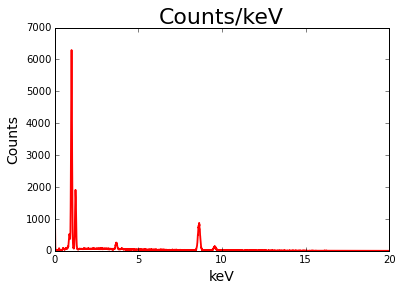

In [11]:
'''For loop to print dataFileRange
Prints filepath of each *.filetype file anaylisied 
Uses dataArray() function to print matrix of each file
Uses dataArray() and plotFile() functions to print each file'''

for files in filesToPlot:
    print files #Prints files
    
    '''dataArray takes 4 arrguments; filename, Delimiter, StartRow, and LastColumn
    Note1: For .csv Delimiter = ',' and for .txt Delimiter = None
    Note2: The variable dataArray is stored as MUST match the getColumn Function'''
    dataToPlot = dataArray(files, None, 26, 3) #Defines data and limits
    print dataToPlot #Prints matrix
    plotFile(dataToPlot, 2, 3) #Generates plot